# 1. Introduction

## Data Set Problems

The company seeks to automate (in real time) the loan qualifying procedure based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval will accelerate the decision-making process for determining whether an applicant is eligible for a loan or not.

## Objectives of Notebook

**This notebook aims to:**
*   Analyze customer data provided in data set (EDA)
*   Build various ML models that can predict loan approval

**The machine learning models used in this project are:** 
1. Logistic Regression
2. K-Nearest Neighbour (KNN)
3. Support Vector Machine (SVM)
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boost

## Data Set Description

There are 13 variables in this data set:
*   8 categorical variables
*   4 continuous variables
*   1 ID variable

The structure of the data set is the following:
<br>
<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Loan_ID</b></td>
<td>Loan reference number <br> (unique ID)</td>
<td>LP001002; LP001003; ...</td>
</tr>
<tr>
<td><b>Gender</b></td>
<td>Applicant gender <br> (Male or Female)</td>
<td>Male; Female</td>
</tr>
<tr>
<td><b>Married</b></td>
<td>Applicant marital status <br> (Married or not married)</td>
<td>Married; Not Married</td>
</tr>
<tr>
<td><b>Dependents</b></td>
<td>Number of family members</td>
<td>0; 1; 2; 3+</td>
</tr>
<tr>
<td><b>Education</b></td>
<td>Applicant education/qualification <br> (graduate or not graduate)</td>
<td>Graduate; Under Graduate</td>
</tr>
<tr>
<td><b>Self_Employed</b></td>
<td>Applicant employment status <br> (yes for self-employed, no for employed/others)</td>
<td>Yes; No</td>
</tr>
<tr>
<td><b>ApplicantIncome</b></td>
<td>Applicant's monthly salary/income</td>
<td>5849; 4583; ...</td>
</tr>
<tr>
<td><b>CoapplicantIncome</b></td>
<td>Additional applicant's monthly salary/income</td>
<td>1508; 2358; ...</td>
</tr>
<tr>
<td><b>LoanAmount</b></td>
<td>Loan amount</td>
<td>128; 66; ...</td>
</tr>
<tr>
<td><b>Loan_Amount_Term</b></td>
<td>The loan's repayment period (in days)</td>
<td>360; 120; ...</td>
</tr>
<tr>
<td><b>Credit_History</b></td>
<td>Records of previous credit history <br> (0: bad credit history, 1: good credit history)</td>
<td>0; 1</td>
</tr>
<tr>
<td><b>Property_Area</b></td>
<td>The location of property <br> (Rural/Semiurban/Urban)</td>
<td>Rural; Semiurban; Urban</td>
</tr>
<tr>
<td><b>Loan_Status</b></td>
<td>Status of loan <br> (Y: accepted, N: not accepted)</td>
<td>Y; N</td>
</tr>
</tbody>
</table>

# 2. Importing Libraries

In [1]:
!pip install missingno imblearn xgboost skl2onnx onnx onnxruntime


[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os

import scipy
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from imblearn.over_sampling import SMOTE

import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

import onnx
import onnxruntime as ort

# 3. Reading Data Set

In [3]:
df = pd.read_csv("../dataset/loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(df.shape)

(614, 13)


👉 There are **13 columns** and **614 observations** in the data set.

# 4. Data Exploration
This section will perform data exploration of the raw data set that has been imported.

## 4.1 Categorical Variables

### 4.1.1 Loan ID

In [5]:
df.Loan_ID.value_counts(dropna=False)

Loan_ID
LP002990    1
LP001002    1
LP001003    1
LP001005    1
LP001006    1
           ..
LP001020    1
LP001024    1
LP001027    1
LP001028    1
LP001029    1
Name: count, Length: 614, dtype: int64

👉 There are 614 unique IDs in the data set.

### 4.1.2 Gender

In [6]:
df.Gender.value_counts(dropna=False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

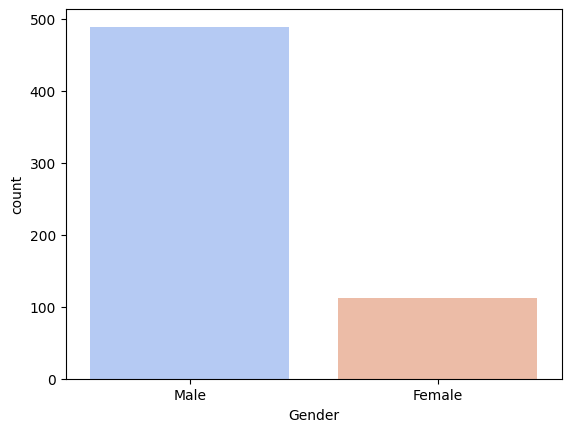

In [7]:
sns.countplot(x="Gender", data=df, palette="coolwarm", hue="Gender", legend=False)
plt.show()

In [8]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicants: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicants: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicants: 79.64%
Percentage of Female applicants: 18.24%
Missing values percentage: 2.12%


👉 The number of male applicants is higher compared to female applicants. And we can observe that there are missing values in this column.

### 4.1.3 Married

In [9]:
df.Married.value_counts(dropna=False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

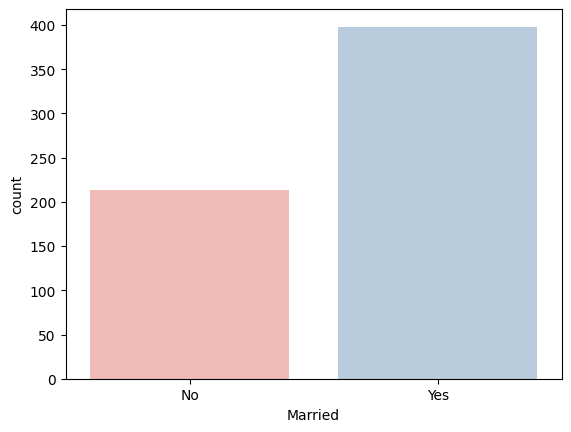

In [10]:
sns.countplot(x="Married", data=df, palette="Pastel1", hue="Married", legend=False)
plt.show()

In [11]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of Married applicants: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Unmarried applicants: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

Percentage of Married applicants: 64.82%
Percentage of Unmarried applicants: 34.69%
Missing values percentage: 0.49%


👉 The number of married applicants is higher compared to unmarried applicants. And we can observe that there are missing values in this column.

### 4.1.4 Education

In [12]:
df.Education.value_counts(dropna=False)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

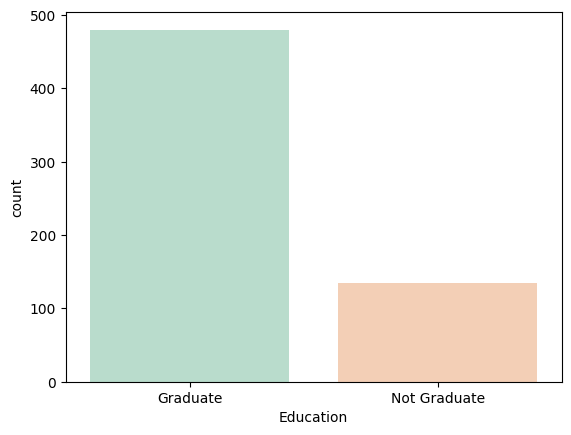

In [13]:
sns.countplot(x="Education", data=df, palette="Pastel2", hue="Education", legend=False)
plt.show()

In [14]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of Graduate applicants: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of Not Graduate applicants: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Percentage of Graduate applicants: 78.18%
Percentage of Not Graduate applicants: 21.82%
Missing values percentage: 0.00%


👉 The number of applicants that have graduated is higher than the number of applicants that haven't graduated. There are no missing values in this column.

### 4.1.5 Self Employed

In [15]:
df.Self_Employed.value_counts(dropna=False)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

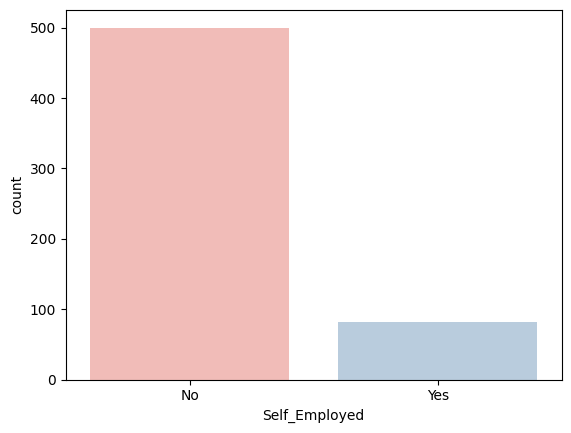

In [16]:
sns.countplot(x="Self_Employed", data=df, palette="Pastel1", hue="Self_Employed", legend=False) 
plt.show()

In [17]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not Self-employed applicants: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of Self-employed applicants: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not Self-employed applicants: 81.43%
Percentage of Self-employed applicants: 13.36%
Missing values percentage: 5.21%


👉 The number of self-employed applicants is lower compared to not self-employed applicants. And we can observe that there are missing values in this column.

### 4.1.6 Credit History

In [18]:
df.Credit_History.value_counts(dropna=False)

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

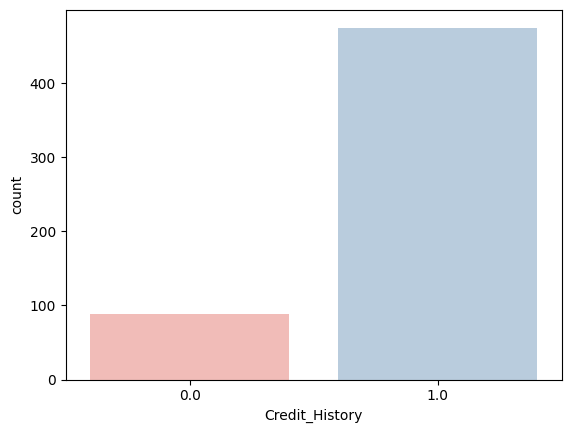

In [19]:
sns.countplot(x="Credit_History", data=df, palette="Pastel1", hue="Credit_History", legend=False)
plt.show()

In [20]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


👉 The number of applicants who have good credit history is higher compared to applicants who have bad credit history. And we can observe that there are missing values in this column.

### 4.1.7 Property Area

In [21]:
df.Property_Area.value_counts(dropna=False)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

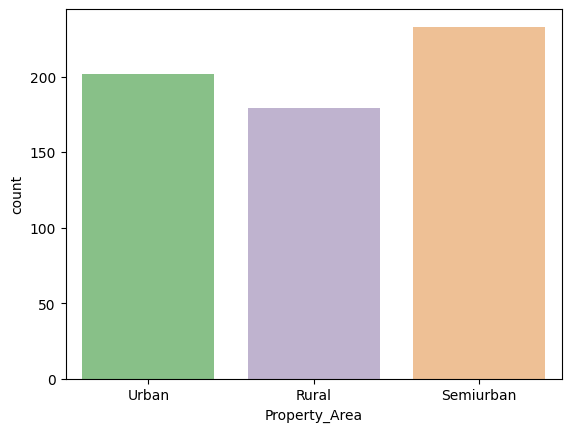

In [22]:
sns.countplot(x="Property_Area", data=df, palette="Accent", hue="Property_Area", legend=False)
plt.show()

In [23]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semi-urban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semi-urban: 37.95%
Missing values percentage: 0.00%


👉 This column has a balanced distribution between Urban, Rural, and Semi-urban property area. There are no missing values in this column.

### 4.1.8 Loan Status

In [24]:
df.Loan_Status.value_counts(dropna=False)

Loan_Status
Y    422
N    192
Name: count, dtype: int64

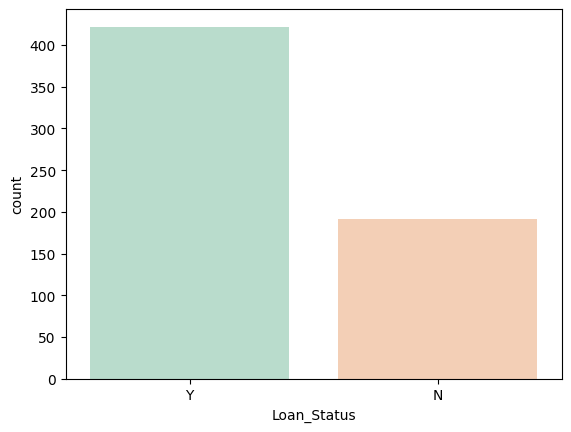

In [25]:
sns.countplot(x="Loan_Status", data=df, palette="Pastel2", hue="Loan_Status", legend=False)
plt.show()

In [26]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


👉 The number of approved loans is higher than the number of rejected loans. There are no missing values in this column.

### 4.1.9 Loan Amount Term

In [27]:
df.Loan_Amount_Term.value_counts(dropna=False)

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

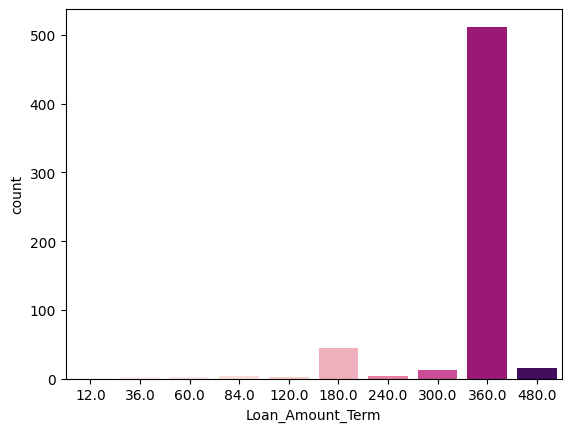

In [28]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="RdPu", hue="Loan_Amount_Term", legend=False)
plt.show()

In [29]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300 = len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))

Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


👉 As we can see from the results, the 360-day loan duration is the most popular compared to other durations.

## 4.2 Numerical Variables

### 4.2.1 Describe Numerical Variables

In [30]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


### 4.2.2 Distribution of Numerical Variable

#### 4.2.2.1 Histogram Distribution

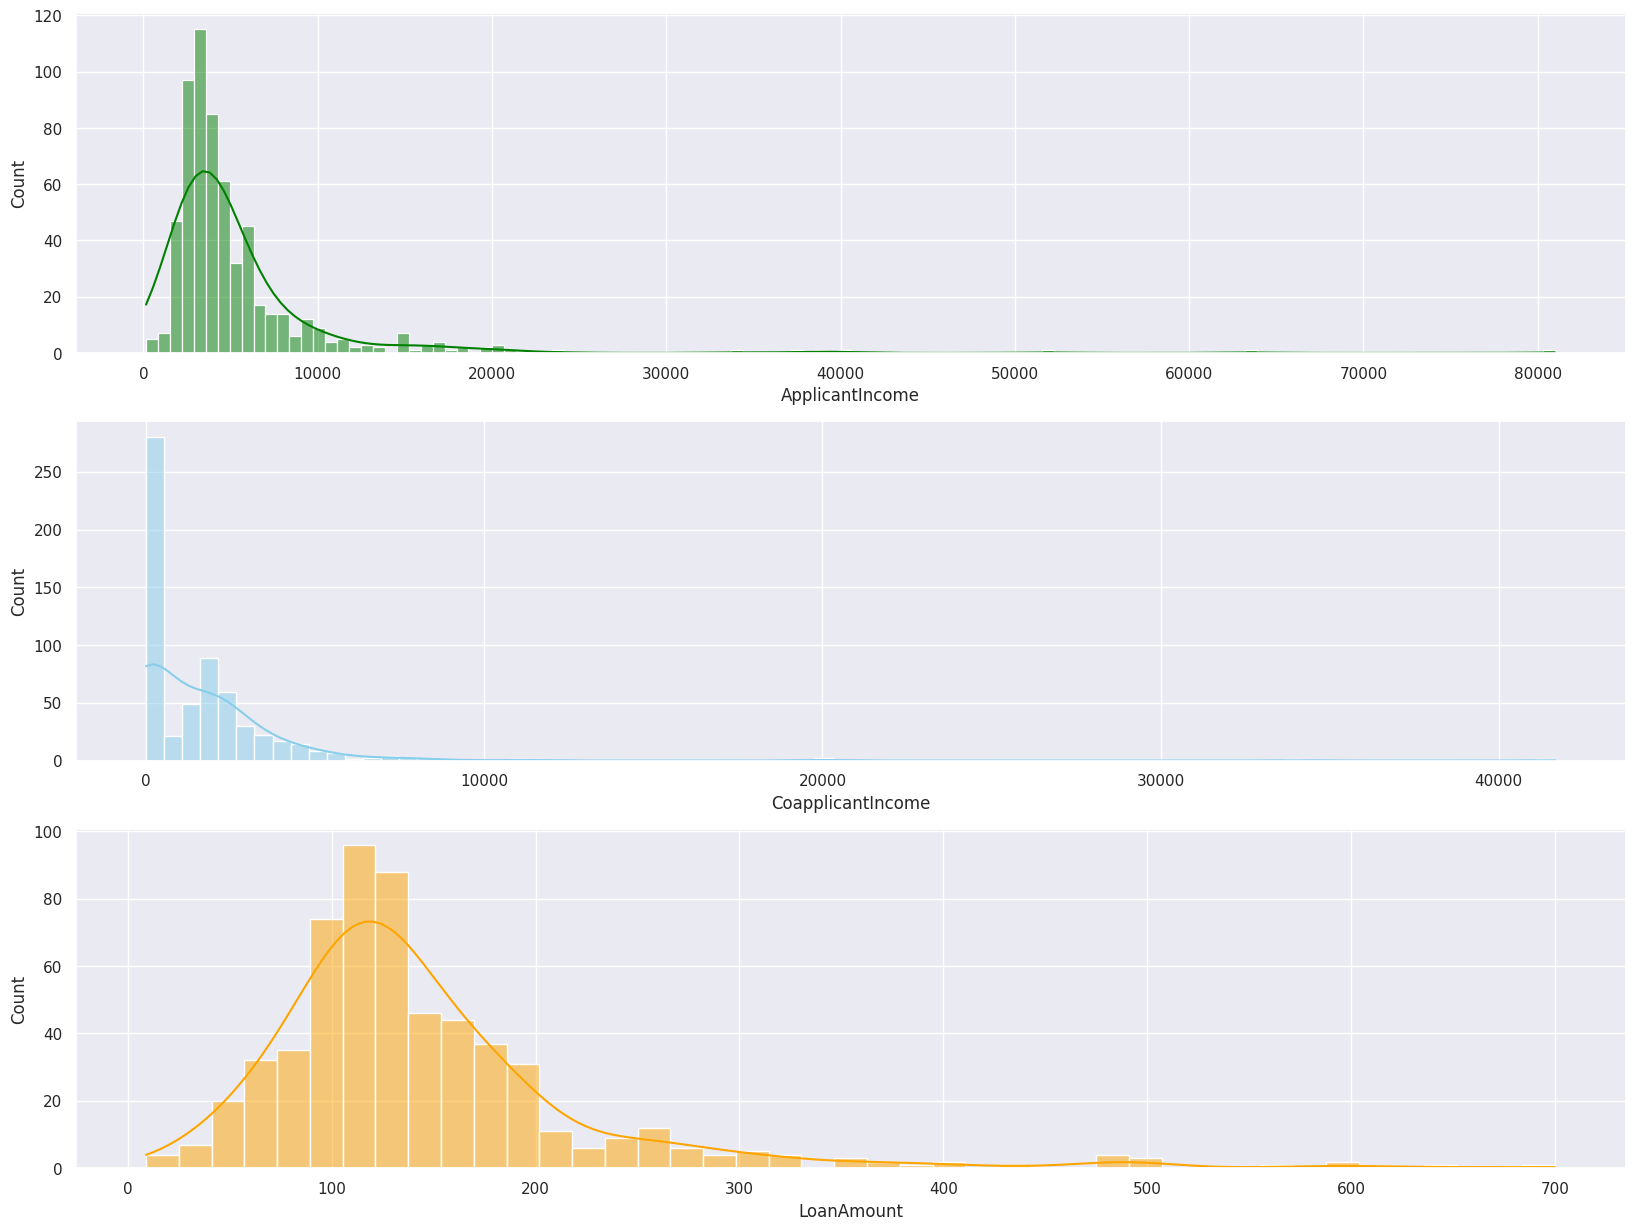

In [31]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 1, figsize=(20, 15))
sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[2], color='orange');

#### 4.2.2.2 Violin Plot

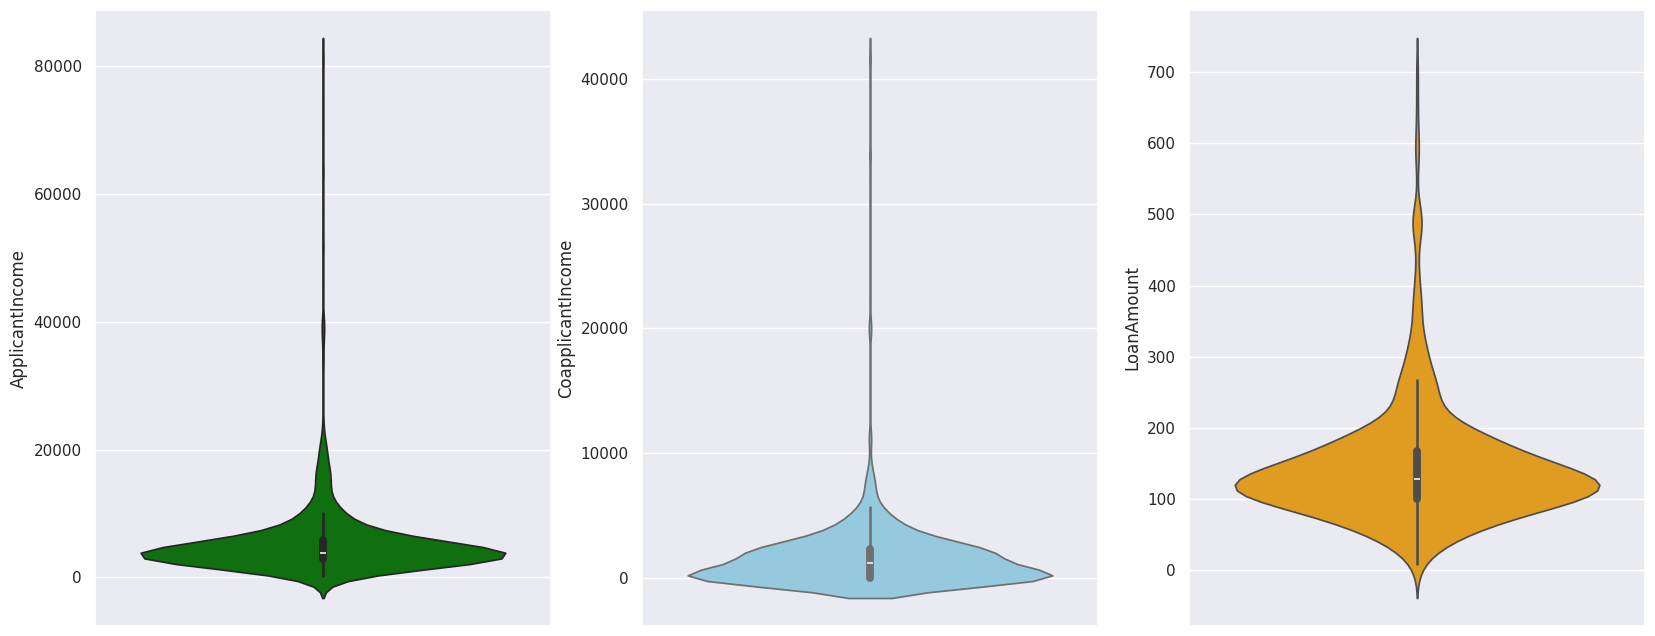

In [32]:
sns.set(style="darkgrid")

fig, axs1 = plt.subplots(1, 3, figsize=(20, 8))
sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[2], color='orange');

👉 The distribution of `ApplicantIncome`, `CoapplicantIncome`, and `LoanAmount` are **positively skewed** and have **outliers**.

## 4.3 Other Exploration

### 4.3.1 Heatmap

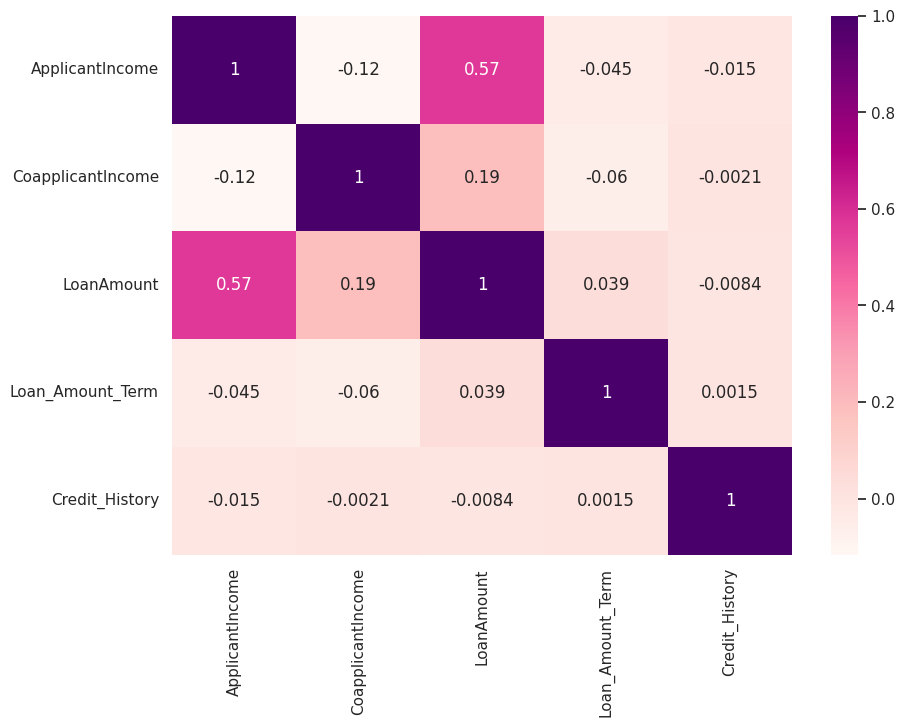

In [33]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdPu')
plt.show()

👉 There is a **positive correlation** between `LoanAmount` and `ApplicantIncome`.

### 4.3.2 Categorical Vs Categorical Variables

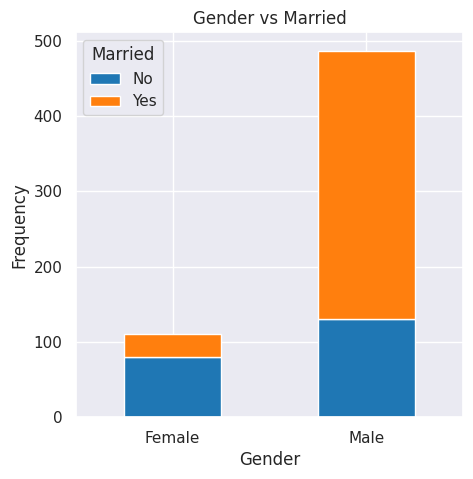

In [34]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['tab:blue','tab:orange'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

👉 More male applicants are married compared to female applicants (relatively). Also, the number of unmarried male applicants is overall higher compared to unmarried female applicants.

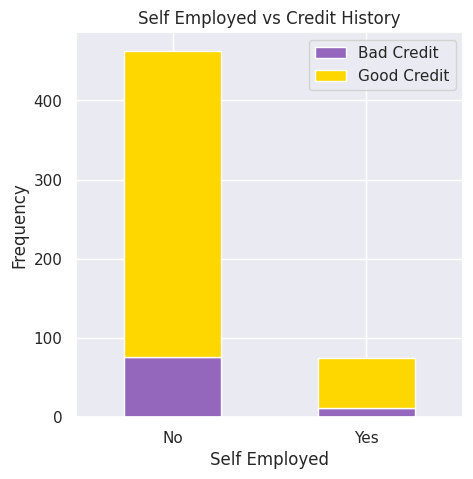

In [35]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['tab:purple','gold'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

👉 More self-employed applicants have good credit compared to not self-employed applicants (relatively).

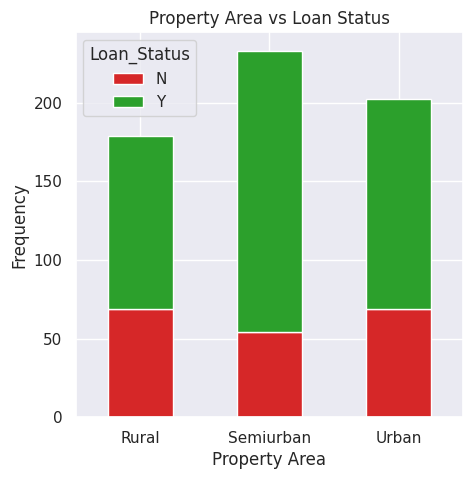

In [36]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['tab:red','tab:green'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

👉 More loans were accepted for applicants with property in Semiurban areas compared to Urban and Rural areas.

### 4.3.3 Categorical Vs Numerical Variables

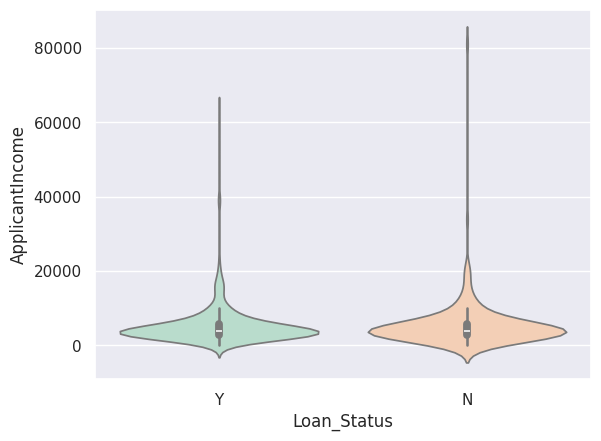

In [37]:
sns.violinplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="Pastel2", hue="Loan_Status",legend=False);

👉 There are lots of outliers in `ApplicantIncome`, and the distribution is also positively skewed.

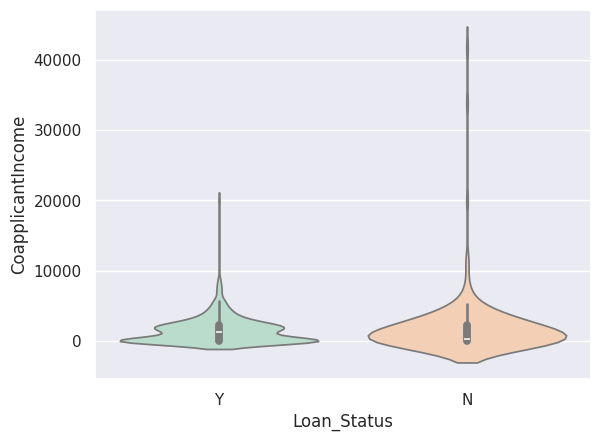

In [38]:
sns.violinplot(x="Loan_Status", y="CoapplicantIncome", data=df, palette="Pastel2", hue="Loan_Status",legend=False);

👉 There are lots of outliers in `CoapplicantIncome`, and the distribution is also positively skewed.

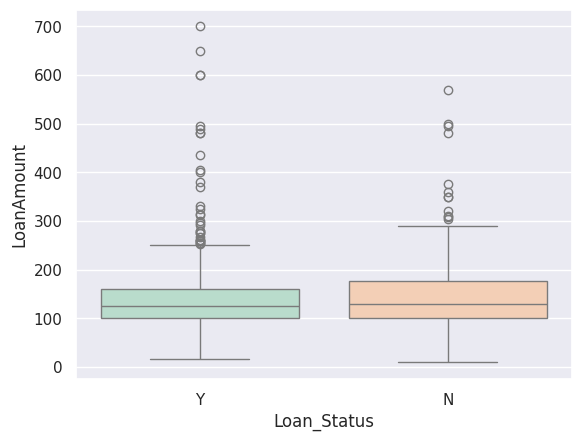

In [39]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="Pastel2", hue="Loan_Status", legend=False);

👉 The column`LoanAmount` has a high number of outliers, and its distribution is also positively skewed.

### 4.3.4 Numerical Vs Numerical Variables

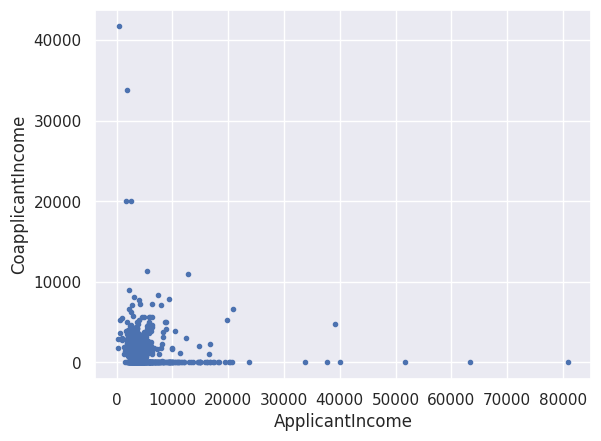

Correlation: -0.11660458122889966


In [40]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='.', legend=False)  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()
print('Correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))

👉 There is a **very slightly negative correlation** between `ApplicantIncome` and `CoapplicantIncome`.

## 4.4 Null Values

In [41]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

👉 There are a few the null values in the dataset, but they do not appear in all columns.

# 5. Data Preprocessing

## 5.1 Drop Unecessary Variables

In [42]:
if 'Loan_ID' in df.columns:
    df = df.drop(['Loan_ID'], axis=1)

## 5.2 Set Variable types

In [43]:
col_types = {'Gender':"str",
             'Married':"str",
             'Dependents':"str",
             'Education':"str",
             'Self_Employed':"str",
             'ApplicantIncome':"float",
             'CoapplicantIncome':"float",
             'LoanAmount':"float",
             'Loan_Amount_Term':"float",
             'Credit_History':"bool",
             'Property_Area':"str",
             'Loan_Status':"str"}

df = df.astype(dtype = col_types)

In [44]:
df = df.replace("nan", None)

## 5.3 Data Imputation
*Imputation* is a technique for substituting an estimated value for missing values in a dataset.

### 5.3.1 Categorical Variables
In this section, the imputation for categorical variables will be performed using the **mode**.

In [45]:
columns_to_fill = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']

for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mode()[0])

In [46]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

### 5.3.2 Numerical Variables
In this section, the imputation for categorical variables will be performed using the **mean**.

In [47]:
columns_to_fill = ['LoanAmount']

for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mean())

In [48]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## 5.4 One-hot Encoding of Categorical Variables
In this section, we will transform categorical variables into binary columns that can be processed by ML algorithms.

In [49]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new_columns = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new_columns, inplace=True)

## 5.5 Remove Outliers for Numerical Variables

In [50]:
# Select only numeric columns except Loan_Amount_Term which is categorical
numeric_df = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]

# Compute mean and standard deviation
mu = np.mean(numeric_df, axis=0)
sigma = np.std(numeric_df, axis=0)

# Filter out the outliers
df = df[~((numeric_df < (mu - 2 * sigma)) | (numeric_df > (mu + 2 * sigma))).any(axis=1)]

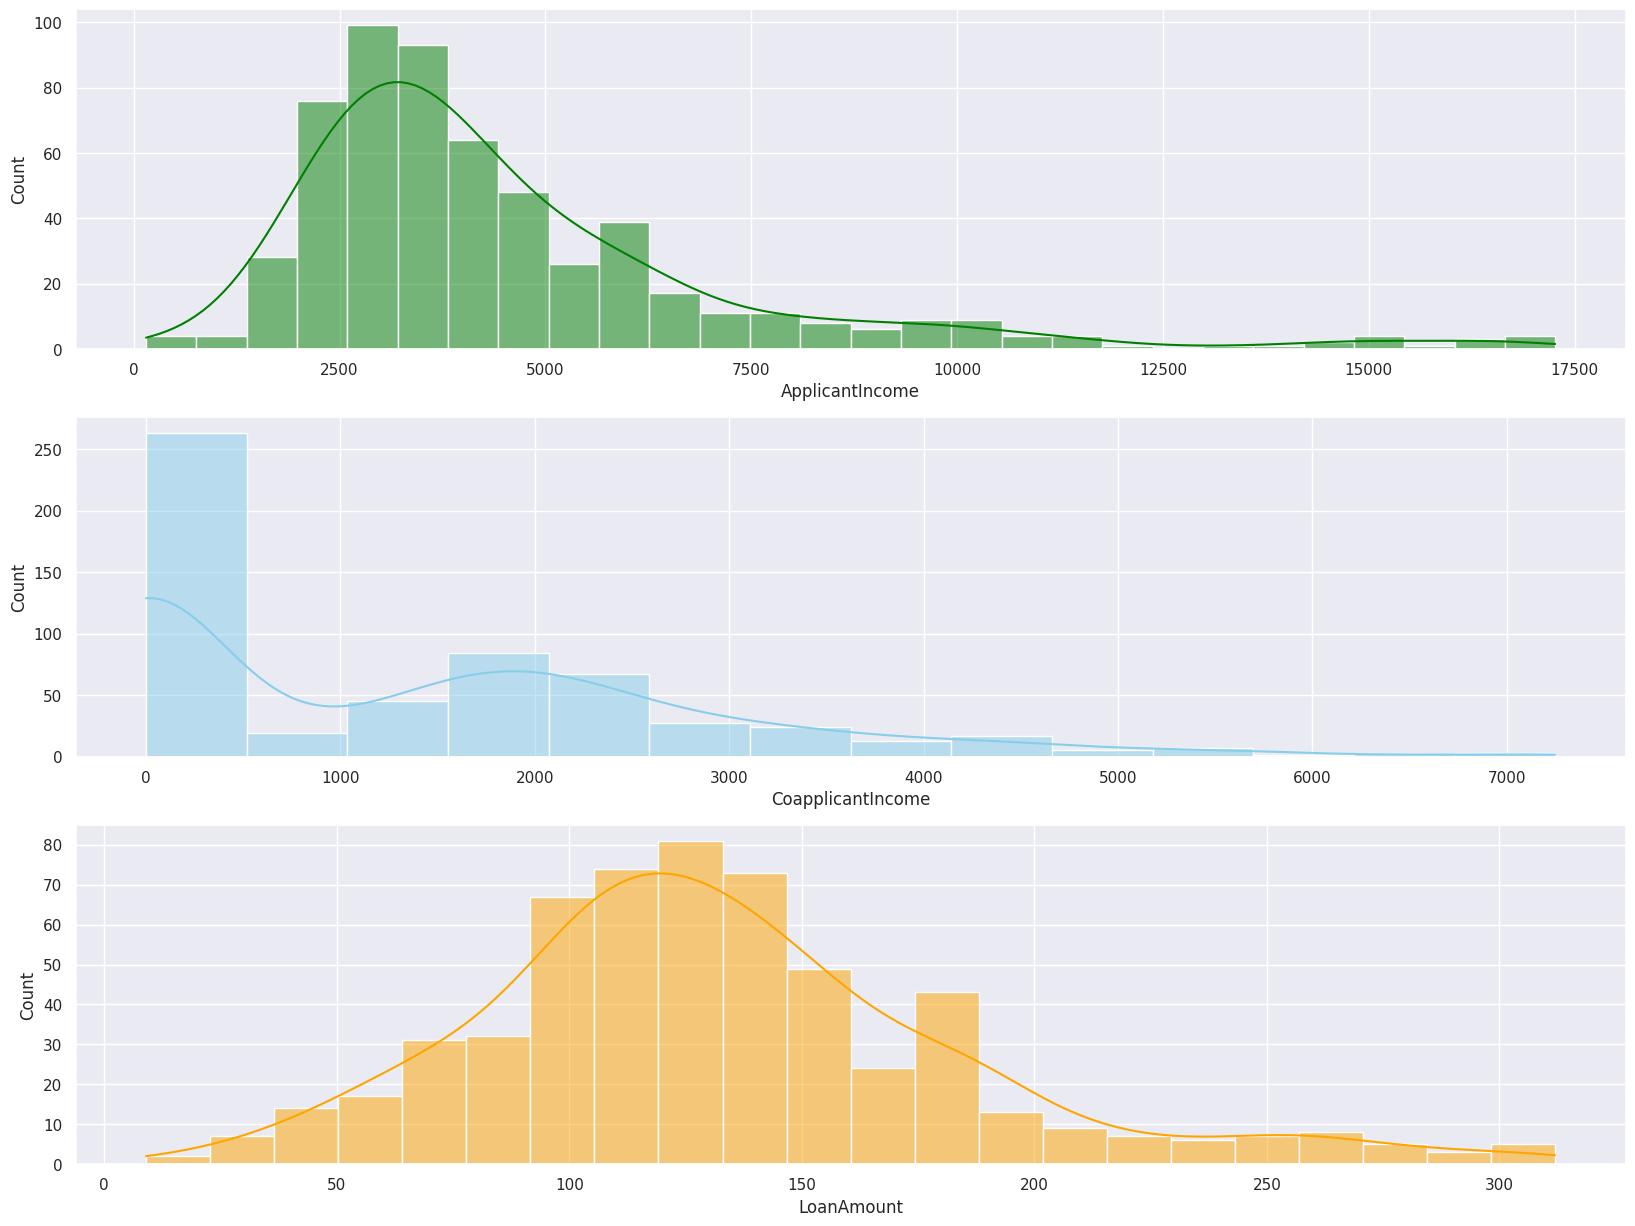

In [51]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 1, figsize=(20, 15))
sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[2], color='orange');

## 5.6 Skewed Distribution Treatment
We will use **square root transformation** to normalize the distribution.

In [52]:
# Apply square root transformation using .loc to avoid SettingWithCopyWarning
df.loc[:, 'ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
df.loc[:, 'CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df.loc[:, 'LoanAmount'] = np.sqrt(df['LoanAmount'])

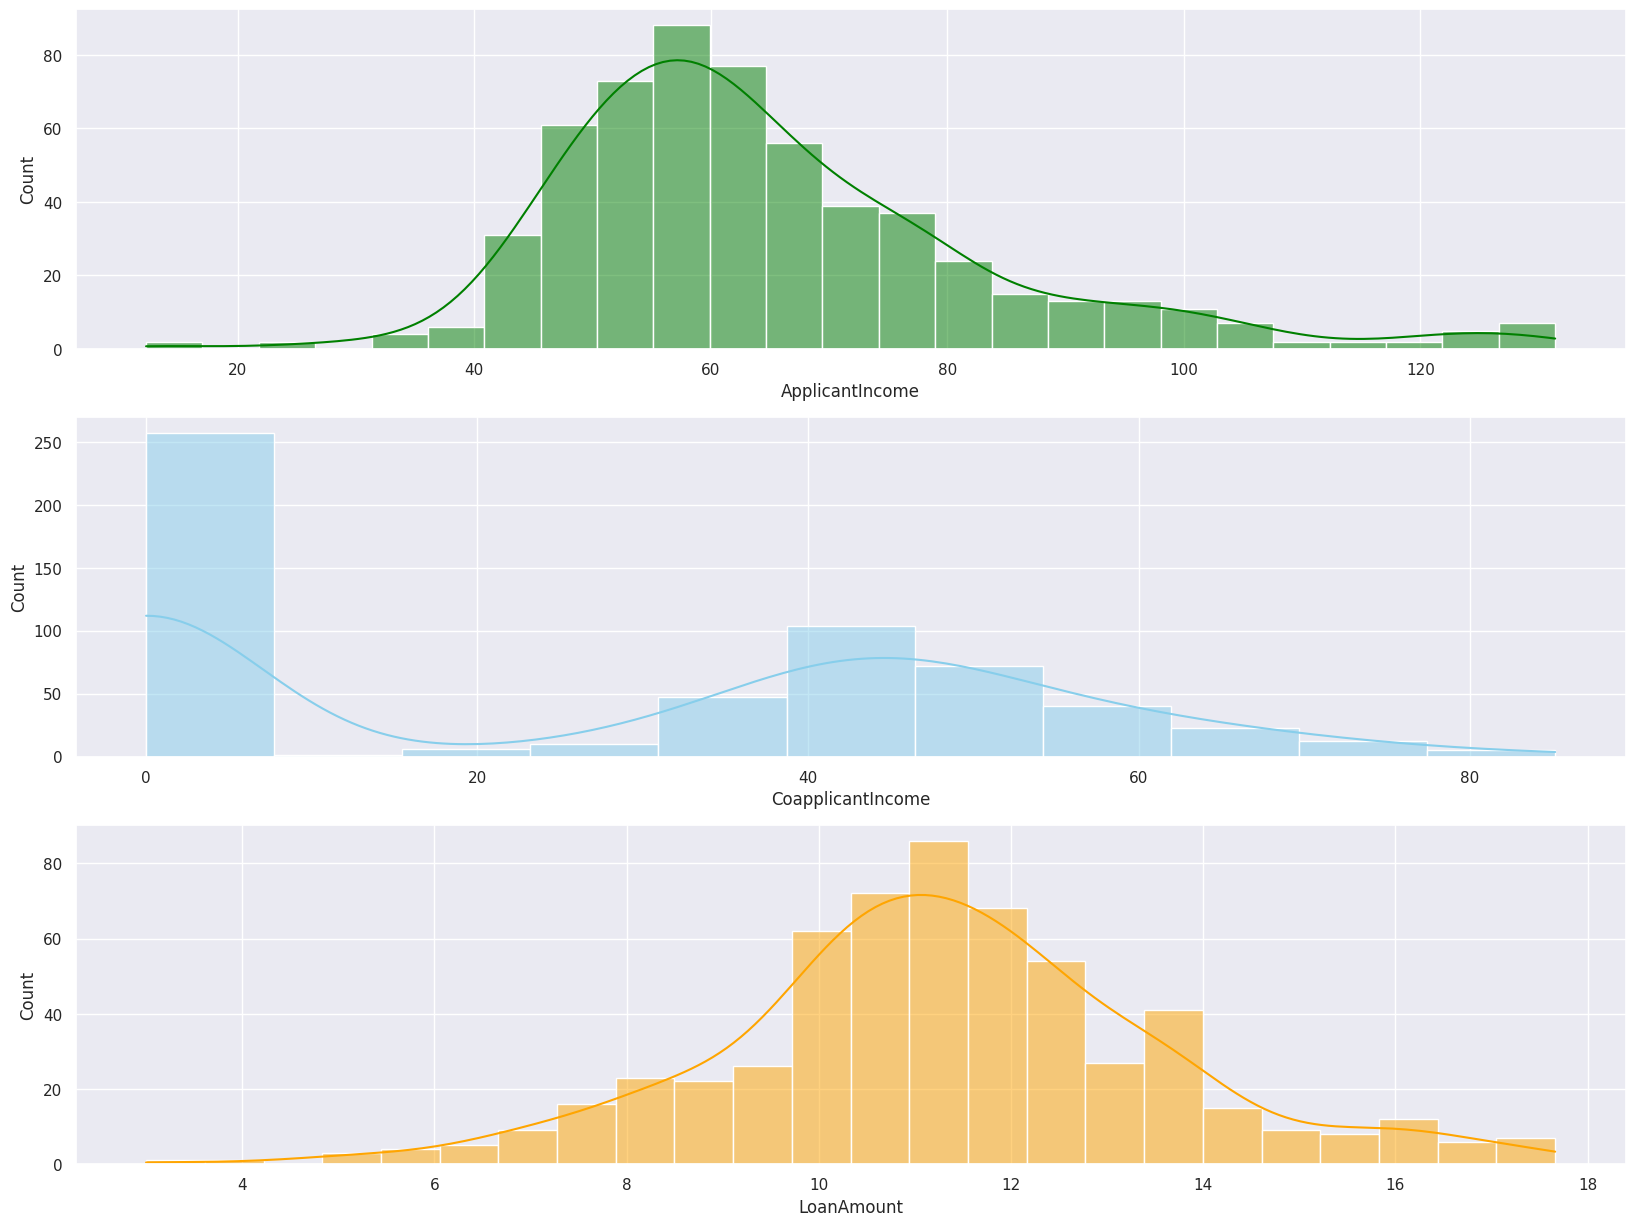

In [53]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 1, figsize=(20, 15))
sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[2], color='orange');

## 5.7 Features Separating
Target features will be seperated from input features.

In [54]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

## 5.8 Balance Data Set
In previous exploration, we saw that the number between approved and rejected loan is imbalanced. In this section, we will use the **SMOTE oversampling technique** to avoid overfitting.

In [55]:
X, y = SMOTE().fit_resample(X, y)

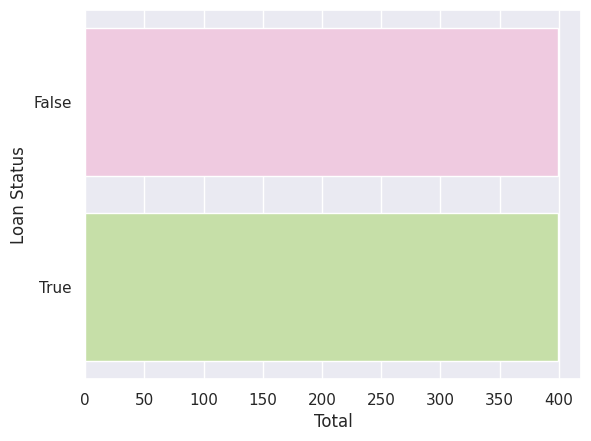

In [56]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="PiYG", hue=y, legend=False)
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

## 5.9 Data Normalization Over Data Set

In [57]:
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

## 5.10 Splitting Data Set
The data set will be split into **80% train and 20% test**.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 6. Models

## 6.1 Logistic Regression

In [59]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

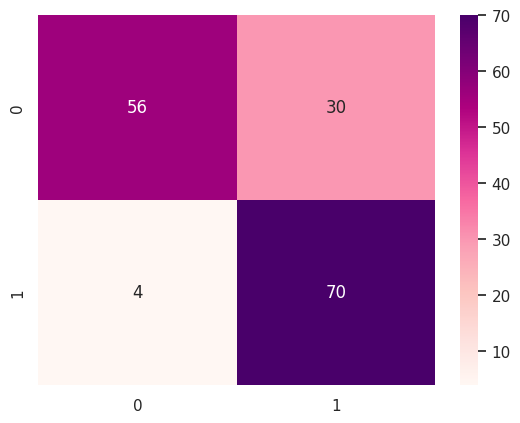

In [60]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='RdPu');

In [61]:
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('Accuracy: {:.2f}%'.format(accuracy_score(y_pred,y_test)*100))

              precision    recall  f1-score   support

       False       0.93      0.65      0.77        86
        True       0.70      0.95      0.80        74

    accuracy                           0.79       160
   macro avg       0.82      0.80      0.79       160
weighted avg       0.83      0.79      0.78       160

Accuracy: 78.75%


In [62]:
# Save model in onnx format
model_path = "../models/LRclassifier.onnx"

initial_type = [('input', FloatTensorType([None, X_train.shape[1]]))]
onnx_model = convert_sklearn(LRclassifier, initial_types=initial_type)

with open(model_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

## 6.2 K-Nearest Neighbour (KNN)

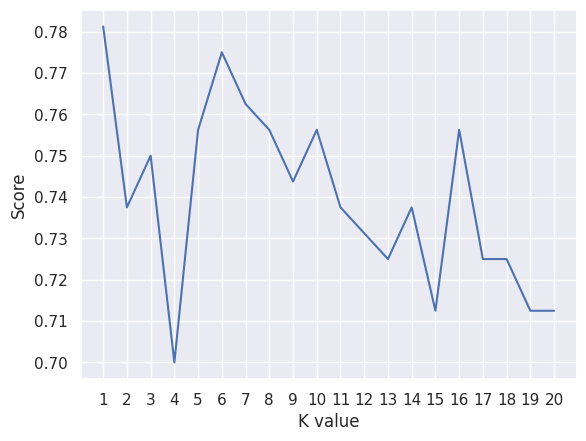

KNN best accuracy: 78.12%


In [63]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

## 6.3 Support Vector Machine (SVM)

In [64]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       False       0.97      0.65      0.78        86
        True       0.71      0.97      0.82        74

    accuracy                           0.80       160
   macro avg       0.84      0.81      0.80       160
weighted avg       0.85      0.80      0.80       160

[[56 30]
 [ 2 72]]
SVC accuracy: 80.00%


/opt/app-root/lib64/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## 6.4 Naive Bayes

### 6.4.1 Categorical NB

In [65]:
#NBclassifier1 = CategoricalNB()
#NBclassifier1.fit(X_train, y_train)

#y_pred = NBclassifier1.predict(X_test)

#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))


# Initialize the encoder with handle_unknown parameter
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit the encoder on the training data
X_train_encoded = encoder.fit_transform(X_train)

# Transform the test data
X_test_encoded = encoder.transform(X_test)

# Replace unknown categories in X_test with the most frequent category from X_train
for i in range(X_test_encoded.shape[1]):
    most_frequent_category = np.argmax(np.bincount(X_train_encoded[:, i].astype(int)))
    X_test_encoded[:, i][X_test_encoded[:, i] == -1] = most_frequent_category

# Initialize and fit the CategoricalNB classifier
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train_encoded, y_train)

# Predict using the encoded test data
y_pred = NBclassifier1.predict(X_test_encoded)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))



              precision    recall  f1-score   support

       False       0.87      0.40      0.54        86
        True       0.57      0.93      0.71        74

    accuracy                           0.64       160
   macro avg       0.72      0.66      0.63       160
weighted avg       0.73      0.64      0.62       160

[[34 52]
 [ 5 69]]
Categorical Naive Bayes accuracy: 64.38%


### 6.4.2 Gaussian NB

In [66]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       False       0.88      0.43      0.58        86
        True       0.58      0.93      0.72        74

    accuracy                           0.66       160
   macro avg       0.73      0.68      0.65       160
weighted avg       0.74      0.66      0.64       160

[[37 49]
 [ 5 69]]
Gaussian Naive Bayes accuracy: 66.25%


## 6.5 Decision Tree

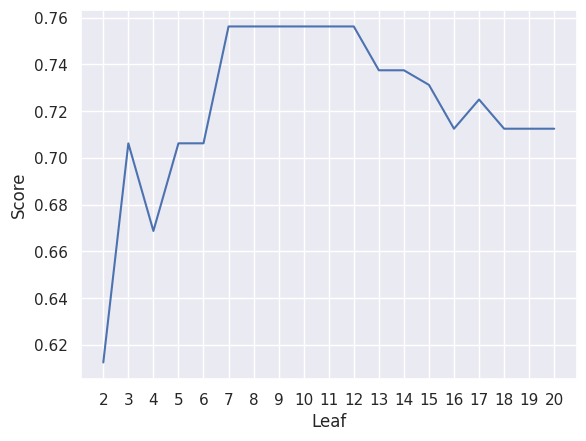

Decision Tree Accuracy: 75.62%


In [67]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

## 6.6 Random Forest

In [ ]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

## 6.7 Gradient Boosting

In [ ]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [ ]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

In [ ]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

In [ ]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

# 7. Model Comparison 👀

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Categorical NB', 
                                  'Gaussian NB', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc1*100, NBAcc2*100, DTAcc*100, 
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

👉 In general, it can be seen that **all models can achieve up to 70% accuracy**. <br>
👉 The highest accuracy is **93%%**. <br><br>
👉 If you have any suggestions to **improve** these models, we can *discuss in the comments* :).